In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [2]:
train = pd.read_csv('image_train_data.csv')
test = pd.read_csv('image_test_data.csv')

In [3]:
def convert_to_image(s):
    one_d = np.array(list(map(int, s[1:-1].split(' '))))
    return one_d.reshape(32, 32, 3)

train['image'] = train['image_array'].apply(convert_to_image)
test['image'] = test['image_array'].apply(convert_to_image)

In [4]:
train.head()

,id,image,label,deep_features,image_array
0,24,"[[[73, 77, 58], [71, 68, 50], [77, 69, 44], [1...",bird,[0.242872 1.09545 0 0.39363 0 0 11.8949 0 0 0 ...,[73 77 58 71 68 50 77 69 44 120 116 83 125 120...
1,33,"[[[7, 5, 8], [7, 5, 8], [5, 4, 6], [7, 4, 7], ...",cat,[0.525088 0 0 0 0 0 9.94829 0 0 0 0 0 1.01264 ...,[7 5 8 7 5 8 5 4 6 7 4 7 11 5 9 11 5 9 17 11 1...
2,36,"[[[169, 122, 65], [131, 108, 75], [193, 196, 1...",cat,[0.566016 0 0 0 0 0 9.9972 0 0 0 1.38345 0 0.7...,[169 122 65 131 108 75 193 196 192 218 221 222...
3,70,"[[[154, 179, 152], [159, 183, 157], [165, 189,...",dog,[1.1298 0 0 0.778194 0 0.758051 9.83053 0 0 0....,[154 179 152 159 183 157 165 189 162 174 199 1...
4,90,"[[[216, 195, 180], [201, 178, 160], [210, 184,...",bird,[1.71787 0 0 0 0 0 9.33936 0 0 0 0 0 0.412137 ...,[216 195 180 201 178 160 210 184 164 212 188 1...


In [5]:
labels = ['dog', 'automobile', 'cat', 'bird']
for x in labels:
    exec("df_{x}_train = train[train['label'] == '{x}'].reset_index(drop=True)".format(x=x))
    exec("df_{x}_test = test[test['label'] == '{x}'].reset_index(drop=True)".format(x=x))

In [6]:
def convert_to_ndarray(df):
    X = df['deep_features'].apply(
        lambda x: np.array(list(map(float, x[1:-1].split())))
                ).values
    return np.array(X.tolist())

In [16]:
neigbor_cat = NearestNeighbors(metric='l2')
X_cat_train = convert_to_ndarray(df_cat_train)
X_cat_test = convert_to_ndarray(df_cat_test)
neigbor_cat.fit(X_cat_train)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='l2',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

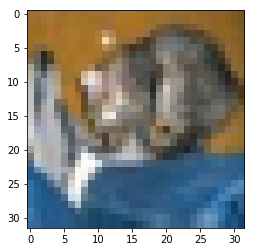

In [17]:
plt.imshow(df_cat_test.iloc[0]['image'])

181


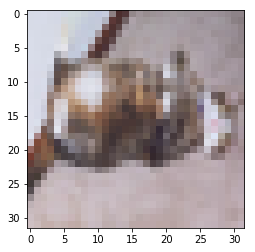

In [18]:
idx = neigbor_cat.kneighbors(X_cat_test[0].reshape(1, -1))[1].squeeze()[0]
print(idx)
plt.imshow(df_cat_train.iloc[idx]['image'])

In [22]:
neigbor_dog = NearestNeighbors()
X_dog_train = convert_to_ndarray(df_dog_train)
X_dog_test = convert_to_ndarray(df_dog_test)
neigbor_dog.fit(X_dog_train)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

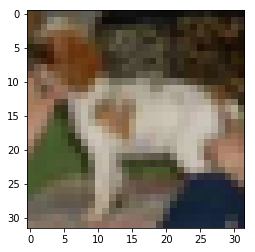

In [23]:
plt.imshow(df_dog_test.iloc[0]['image'])

159


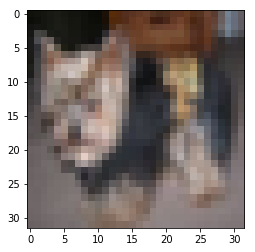

In [25]:
idx = neigbor_dog.kneighbors(X_cat_test[0].reshape(1, -1))[1].squeeze()[0]  
# to the first image, which is a cat
print(idx)
plt.imshow(df_dog_train.iloc[idx]['image'])

In [29]:
neigbor_dog.kneighbors(X_cat_test[0].reshape(1, -1))[0].mean()

37.770711933529562

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
X_train = convert_to_ndarray(train)
y_train = train['label']

In [39]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
           weights='uniform')

In [40]:
X_test, y_test = convert_to_ndarray(test), test['label']

In [42]:
y_pred = knn.predict(X_test)

In [62]:
y_dog_test = (y_test[np.argwhere(y_test == 'dog').reshape(1, -1).squeeze()])
y_dog_pred = (y_pred[np.argwhere(y_test == 'dog').reshape(1, -1).squeeze()])

In [64]:
(y_dog_pred == y_dog_test).mean()

0.67800000000000005